In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import os
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import json
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

In [2]:
rats = ['q', 'q', 'r1', 'r1', 'r1', 's', 'r2', 'r2', 'r2']
mods = ['1', '2', '1', '2', '3', '1', '1', '2', '3']
Grids = []
cell_trial_dicts = []

for rat, mod in zip(rats, mods):
    G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)
    Grids.append(G)
    
    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
        cell_trial_dict = json.load(f)
    cell_trial_dicts.append(cell_trial_dict)

Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q1 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q2 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r11 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r12 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r13 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\s1 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r21 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r22 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r23 already exists


In [3]:
fig_directory = r'C:\Users\acostamendoza\Box\grid-cell-project\sup-accepted-rejected'

In [4]:
def return_accepted(G, cell_trial_dict, threshold = 5):

    rejected = np.where(np.array(G.orientation) == None)[0]
    
    accepted = []
    accepted_none_trials = []
   
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
            elif cell_trial_dict[cell][trial]['spacing_even'] is None:
                none_trials += 1
                
        if none_trials <= threshold:
            accepted.append(int(cell))
            
        accepted_none_trials.append(none_trials)
        
    rejected_2 = np.setdiff1d(np.where(np.array(G.orientation) != None)[0], accepted)
    
    grid_score_accepted = []
    grid_score_rejected = []
    grid_score_rejected_2 = []
    
    for cell in accepted:
        grid_score_accepted.append(G.grid_scores[cell])
    for cell in rejected:
        grid_score_rejected.append(G.grid_scores[cell])
    for cell in rejected_2:
        grid_score_rejected_2.append(G.grid_scores[cell])
        
    return accepted, rejected, rejected_2, grid_score_accepted, grid_score_rejected, grid_score_rejected_2, accepted_none_trials

In [5]:
threshold = 5

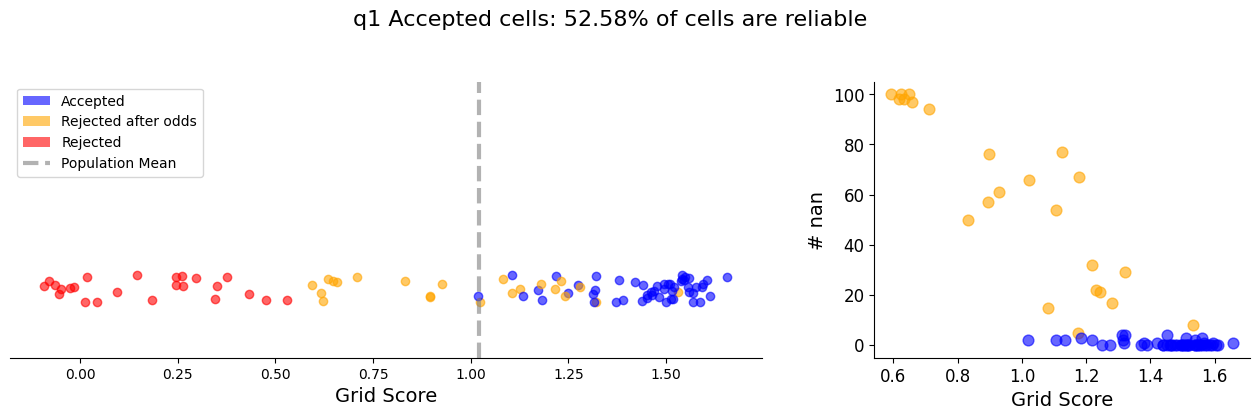

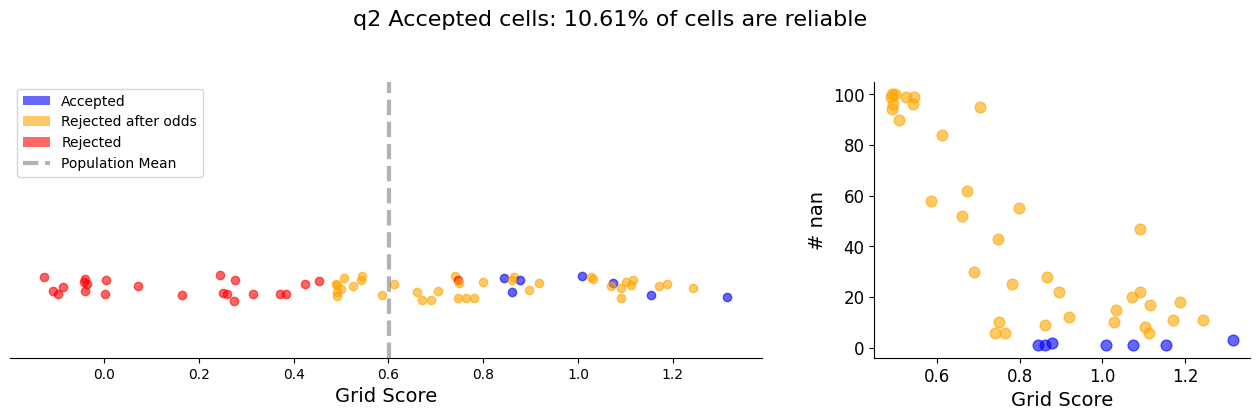

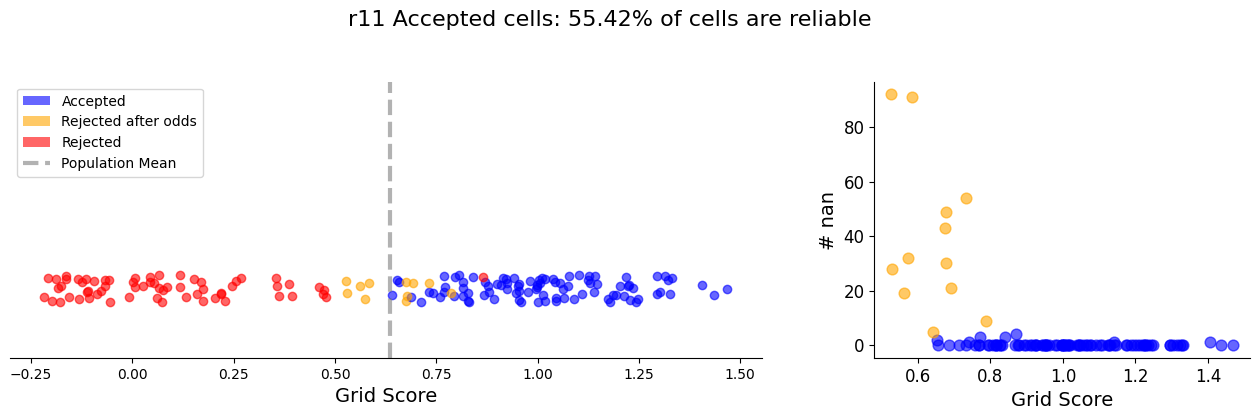

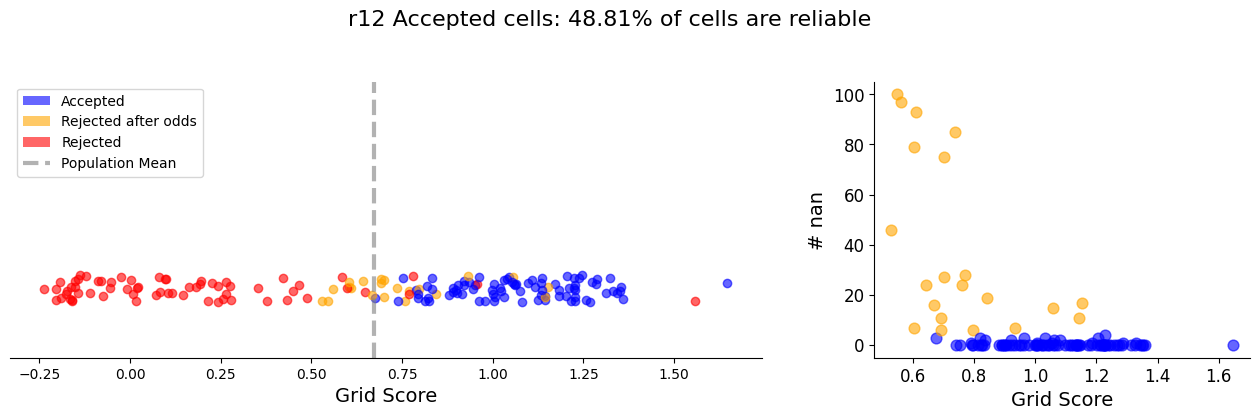

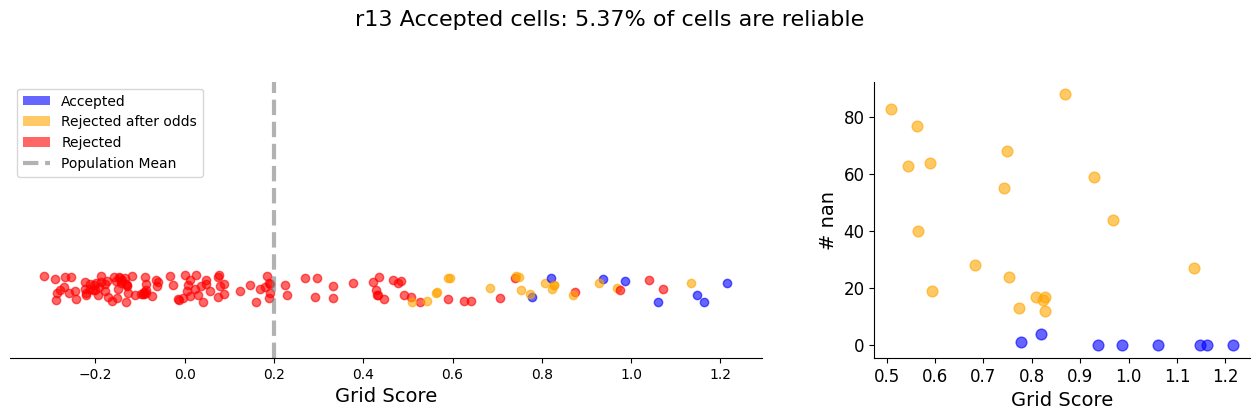

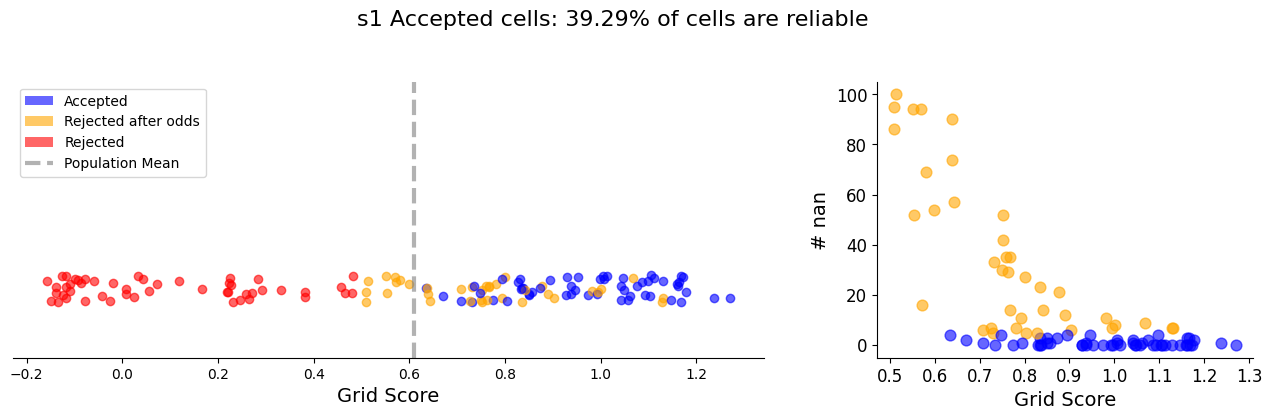

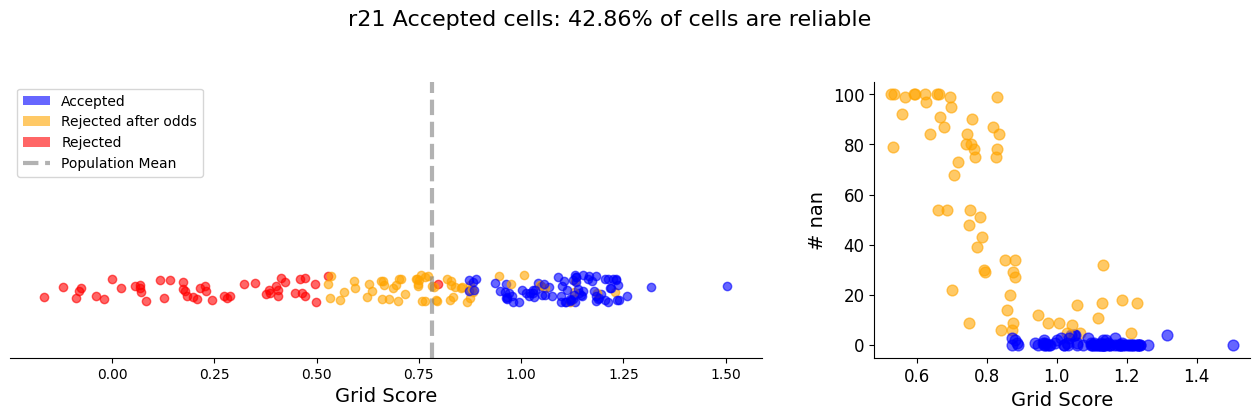

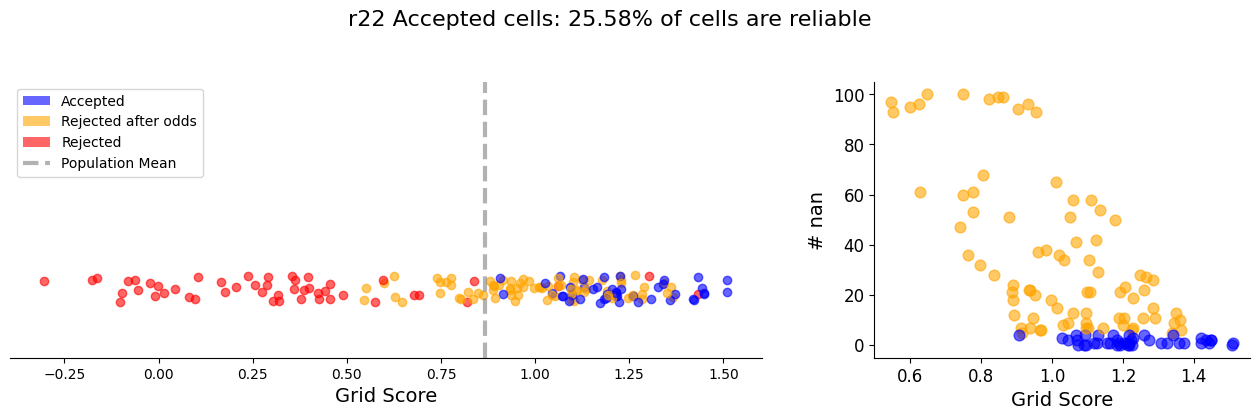

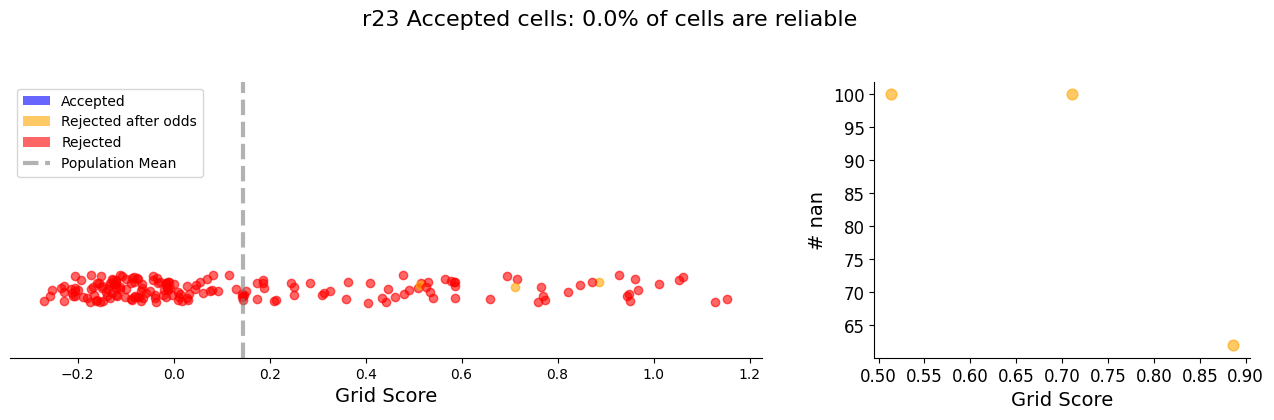

In [6]:
for G, cell_trial_dict, rat, mod in zip(Grids, cell_trial_dicts, rats, mods):
    
    accepted, rejected, rejected_2, grid_score_accepted, grid_score_rejected, grid_score_rejected_2, accepted_none_trials = return_accepted(G, cell_trial_dict, threshold = threshold)

    count_none = G.orientation.count(None)
    count_non_none = len(G.orientation) - count_none
    
    all_grid_scores = np.array(G.grid_scores)
    percentage_accepted = 100 * len(accepted)/len(G.orientation)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [2, 1]})
    
    fig.suptitle(rat + mod + ' Accepted cells: ' + str(round(percentage_accepted, 2)) + '% of cells are reliable', fontsize=16)
    # add some space between suptitle and plots
    fig.subplots_adjust(top=0.8)
    
    ax = axes[0]
    for cell, grid_score in enumerate(G.grid_scores):
        if G.orientation[cell] is None:
            color = 'red'
        elif cell in rejected_2:
            color = 'orange'
        else:
            color = 'blue'
    
        ax.scatter(grid_score, random.uniform(-.1, .1), color=color, alpha=0.6)
    
    ax.set_ylim(-.5, 1.5)
    legend_elements = [Patch(facecolor='blue', alpha=0.6, label='Accepted'),
                        Patch(facecolor='orange', alpha=0.6, label='Rejected after odds'),
                       Patch(facecolor='red', alpha=0.6, label='Rejected'),
                       Line2D([0], [0], color='gray', lw=3, ls='--', alpha=0.6, label='Population Mean')]
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.axvline(np.mean(all_grid_scores), ls='--', alpha=0.6, color='gray', linewidth=3)
    ax.set_yticks([])
    plt.xticks(fontsize=12)
    
    ax.legend(handles=legend_elements, loc='upper left')
    # ax.set_title(rat + mod + ' Accepted cells: ' + str(round(percentage_accepted, 2)) + '% of cells are reliable', fontsize=16)
    ax.set_xlabel('Grid Score', fontsize=14)
    
    ax = axes[1]
    
    for i, cell in enumerate(cell_trial_dict):
        
        if accepted_none_trials[i] < threshold:
            color = 'blue'
        else:
            color = 'orange'
        
        plt.scatter(G.grid_scores[int(cell)], accepted_none_trials[i], color=color, alpha=0.6, s=60)
        
    ax.set_xlabel('Grid Score', fontsize = 14)
    ax.set_ylabel('# nan', fontsize = 14)
    # ax.title(rat + mod + ' # Rejected trials vs Grid Score', fontsize=16
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # set tp and right spline to none
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig(fig_directory + '/' + rat + mod + '_accepted-rejected.png', dpi=300)


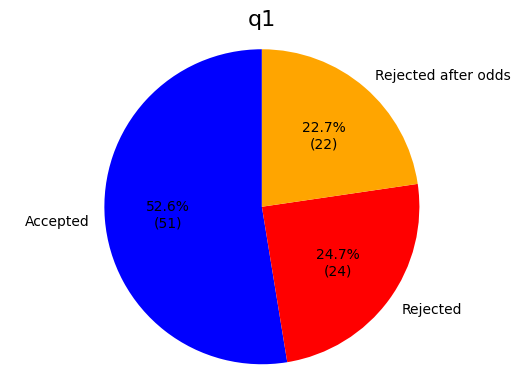

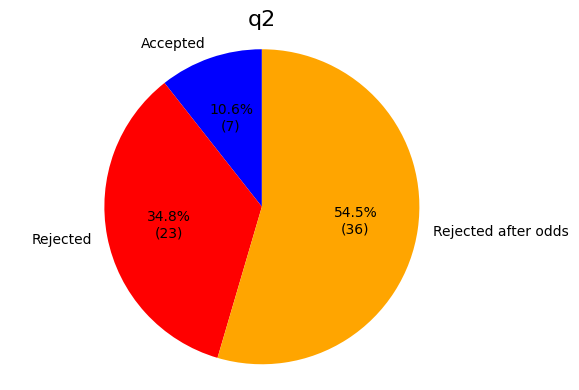

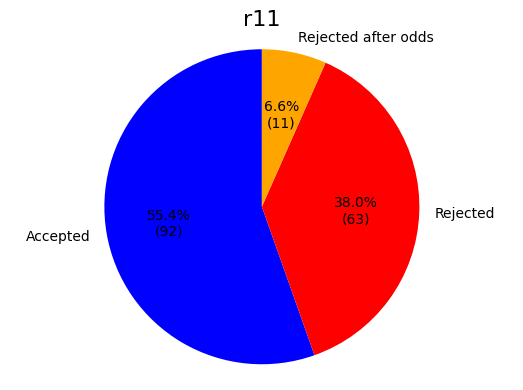

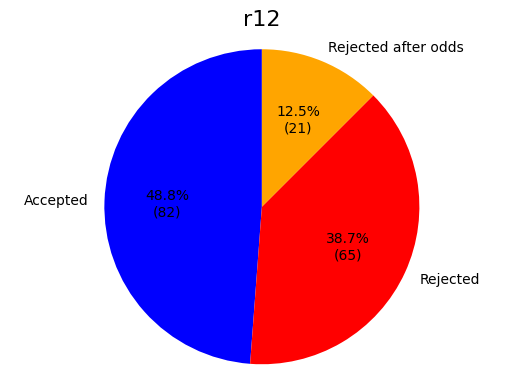

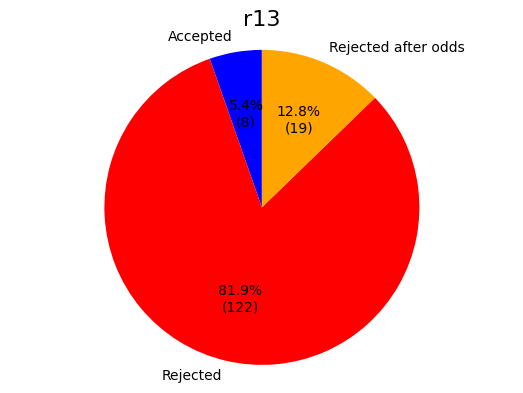

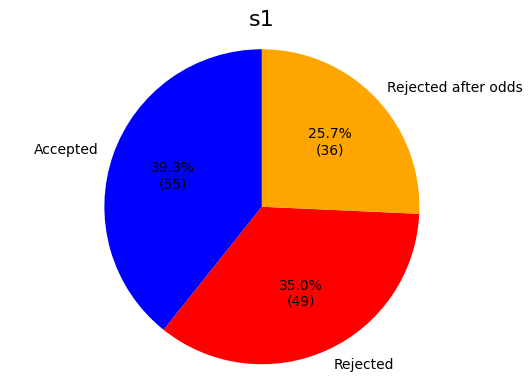

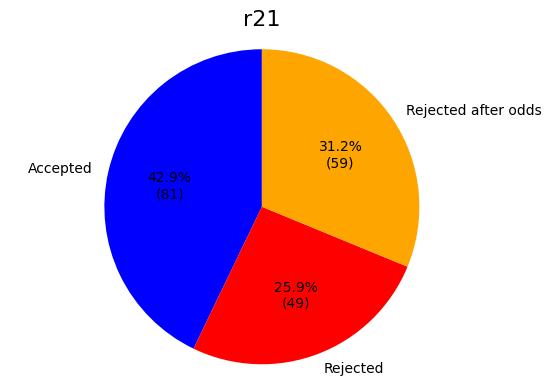

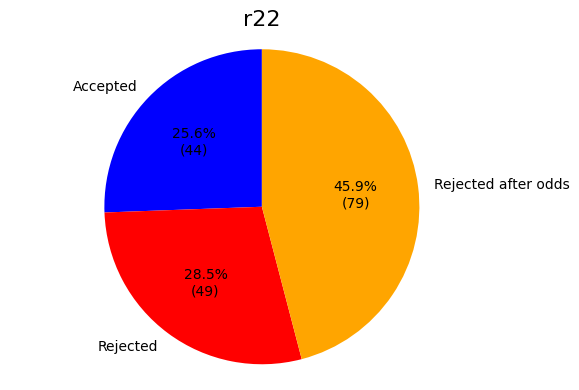

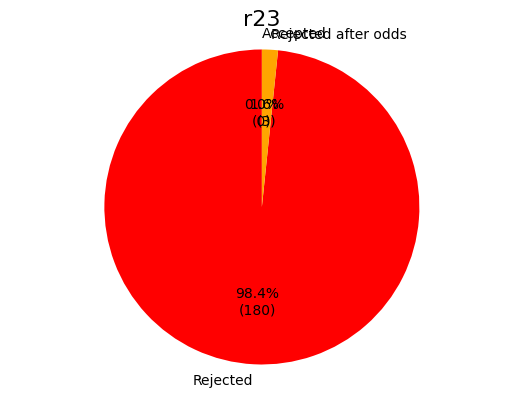

In [25]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format


for G, cell_trial_dict, rat, mod in zip(Grids, cell_trial_dicts, rats, mods):
    
    accepted, rejected, rejected_2, grid_score_accepted, grid_score_rejected, grid_score_rejected_2, accepted_none_trials = return_accepted(G, cell_trial_dict, threshold = threshold)
    
    # have a pie plot with accepted, rejected, rejected_2
    labels = ['Accepted', 'Rejected', 'Rejected after odds']
    sizes = [len(accepted), len(rejected), len(rejected_2)]
    
    total_sum = sum(sizes)
    percentages = [round(value / total_sum * 100, 1) for value in sizes] 
    colors = ['blue', 'red', 'orange']
    explode = (0.1, 0, 0)  # explode 1st slice
    
    fig1, ax1 = plt.subplots(figsize=(6.5, 4.5))
    ax1.pie(sizes, labels=labels, autopct=autopct_format(sizes), colors = colors , shadow=False, startangle=90)
    # have them be the colors
    
    # include the number of samples in each category
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(rat + mod, fontsize=16)
    
    plt.savefig(fig_directory + '/' + rat + mod + '_pie-plot.png', dpi=300)
    plt.savefig(fig_directory + '/' + rat + mod + '_pie-plot.svg', dpi=300)
    
